In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',1000)

# Importing Data

In [226]:
data = pd.read_csv(r'/media/abhinav/Data/MGP-themlco/Road-Traffic-severity-Classification/RTA Dataset.csv',low_memory=False)
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# Data Cleaning

In [227]:
# categorical variables
data.describe(include=['O'])

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [228]:
# numerical variables
data.describe(exclude=['O'])

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [229]:
# Removing columns that has >15% null values
data = data[data.columns[data.isna().sum()*100/data.shape[0]<15]]
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [230]:
for col in data.select_dtypes(exclude='number').columns:
    print(col)
    print(Counter(data[col]),data[col].isna().sum())

Time
Counter({'15:30:00': 120, '17:10:00': 110, '18:30:00': 103, '11:30:00': 99, '17:00:00': 98, '16:00:00': 97, '18:00:00': 95, '19:00:00': 94, '17:50:00': 88, '16:30:00': 87, '17:25:00': 87, '20:30:00': 86, '15:00:00': 83, '12:00:00': 81, '15:20:00': 79, '18:40:00': 78, '17:45:00': 77, '12:30:00': 77, '7:50:00': 76, '17:30:00': 75, '15:40:00': 73, '13:00:00': 73, '8:40:00': 71, '8:00:00': 70, '14:30:00': 66, '17:35:00': 65, '16:55:00': 62, '20:00:00': 62, '16:10:00': 62, '14:00:00': 56, '17:40:00': 55, '18:20:00': 55, '7:30:00': 53, '20:15:00': 53, '8:30:00': 53, '19:30:00': 53, '16:50:00': 53, '9:25:00': 52, '10:30:00': 52, '11:10:00': 52, '20:40:00': 51, '8:20:00': 49, '16:20:00': 49, '14:20:00': 49, '8:45:00': 49, '22:05:00': 48, '13:15:00': 48, '8:50:00': 47, '11:50:00': 47, '15:50:00': 46, '19:40:00': 46, '9:00:00': 46, '10:40:00': 46, '18:45:00': 45, '15:10:00': 44, '12:15:00': 44, '17:20:00': 43, '16:05:00': 43, '8:55:00': 43, '15:15:00': 43, '22:30:00': 43, '9:30:00': 43, '8:

In [231]:
col = "Type_of_vehicle"
print(Counter(data[col]),data[col].isna().sum())

Counter({'Automobile': 3205, 'Lorry (41?100Q)': 2186, 'Other': 1208, nan: 950, 'Pick up upto 10Q': 811, 'Public (12 seats)': 711, 'Stationwagen': 687, 'Lorry (11?40Q)': 541, 'Public (13?45 seats)': 532, 'Public (> 45 seats)': 404, 'Long lorry': 383, 'Taxi': 265, 'Motorcycle': 177, 'Special vehicle': 84, 'Ridden horse': 76, 'Turbo': 46, 'Bajaj': 29, 'Bicycle': 21}) 950


In [232]:
data[['hour','min']] = data['Time'].astype(str).str.split(":",n=1,expand=True)
data['hour'] = data['hour'].astype(int)
data.drop(columns='Time',inplace=True)

for col in data.select_dtypes(exclude='number').columns:
    data[col] = data[col].astype(str).str.strip().str.lower()
    if "other" in data[col].unique():
        data[col].fillna("other",inplace=True)
        if 'nan' in data[col].unique() or 'na' in data[col].unique():
            data.loc[data[data[col]=='nan'].index,col] = 'other'
            data.loc[data[data[col]=='na'].index,col] = 'other'
    elif "unknown" in data[col].unique():
        data[col].fillna("unknown",inplace=True)
        if 'nan' in data[col].unique() or 'na' in data[col].unique():
            data.loc[data[data[col]=='nan'].index,col] = 'unknown'
            data.loc[data[data[col]=='na'].index,col] = 'unknown'
    else:
        data.loc[data[data[col]=='na'].index,col] = 'unknown'
        
data['Area_accident_occured'] = data['Area_accident_occured'].astype(str).str.replace("areas","")
data['Type_of_vehicle'] = data['Type_of_vehicle'].map({'automobile': '4-wheeler',
                                                        'public (> 45 seats)': 'public transport',
                                                        'lorry (41?100q)': 'heavy-duty vehicle',
                                                        'public (13?45 seats)': 'public transport',
                                                        'lorry (11?40q)': 'heavy-duty vehicle',
                                                        'long lorry': 'heavy-duty vehicle',
                                                        'public (12 seats)': 'public transport',
                                                        'taxi': '4-wheeler',
                                                        'pick up upto 10q': '4-wheeler',
                                                        'stationwagen': '4-wheeler',
                                                        'ridden horse': 'other',
                                                        'other': 'other',
                                                        'bajaj': '2-wheeler',
                                                        'turbo': '2-wheeler',
                                                        'motorcycle': '2-wheeler',
                                                        'special vehicle': 'other',
                                                        'bicycle': '2-wheeler'})
data['Pedestrian_movement'] = data['Pedestrian_movement'].astype(str).str.replace('stationot a pedestrianry',
                                                                                  'stationary not a pedestrian')


### Univariate Analysis

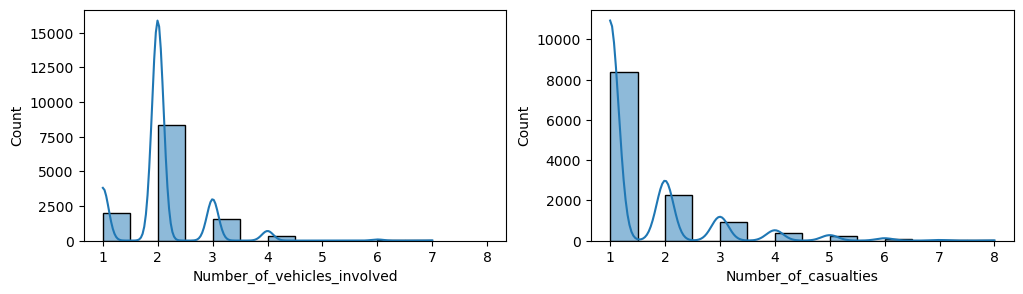

In [235]:
fig, ax = plt.subplots(1,2,figsize=(12,3),sharex=True)
sns.histplot(data = data,x = 'Number_of_vehicles_involved',kde=True,ax=ax[0],binwidth=0.5)
sns.histplot(data = data,x = 'Number_of_casualties',kde=True,ax=ax[1],binwidth=0.5)
plt.show()

Both the numerical variables follows a discrete distribution instead of a continous one. so its good to categorize them for further analysis.

## Bivariate Analysis

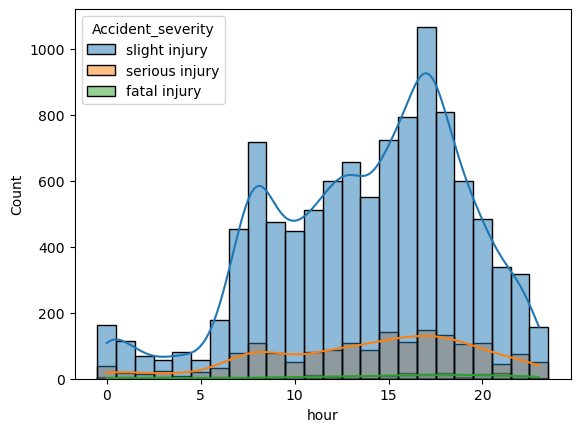

In [177]:
sns.histplot(data=data,x='hour',hue='Accident_severity',discrete=True,binwidth=0.1,bins = 200,kde=True)
plt.show()

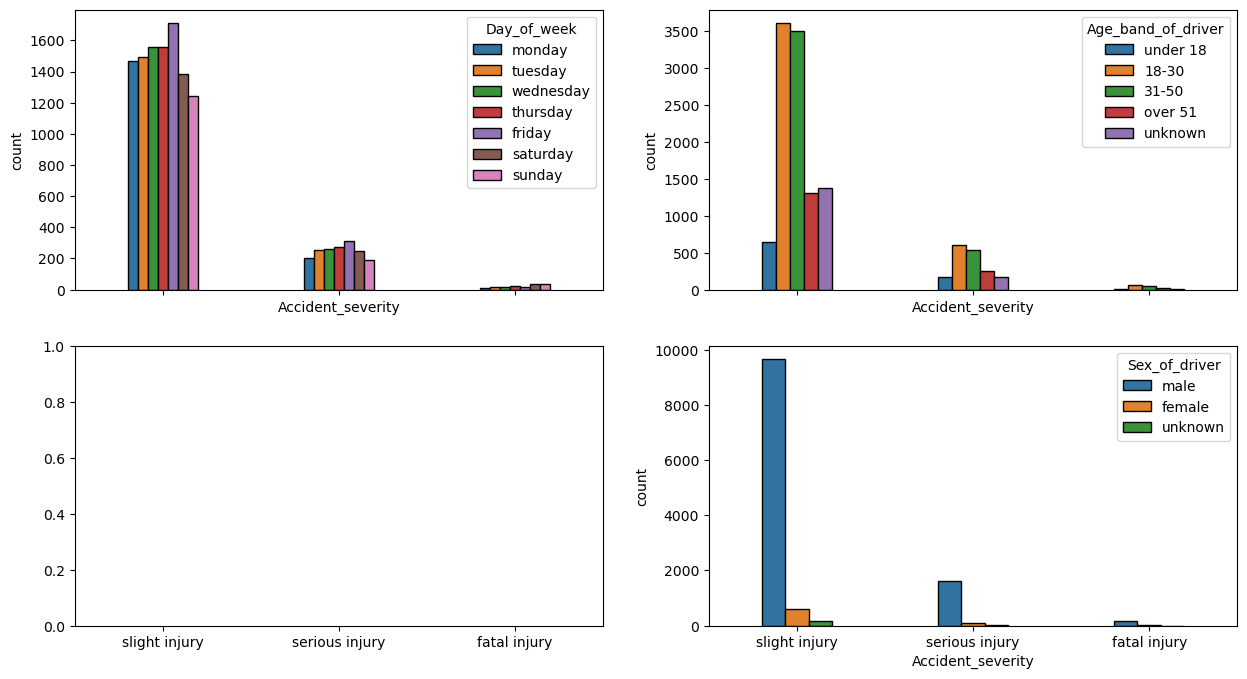

In [181]:
fig,ax = plt.subplots(2,2,figsize=(15,8),sharex=True)
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Day_of_week',
              hue_order=['monday','tuesday','wednesday','thursday','friday','saturday','sunday'],ax=ax[0,0])
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Age_band_of_driver',
              hue_order=['under 18','18-30','31-50' ,'over 51','unknown'],ax=ax[0,1])
sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.4,
              hue='Sex_of_driver',
              hue_order=['male','female','unknown'],ax=ax[1,1])

plt.show()


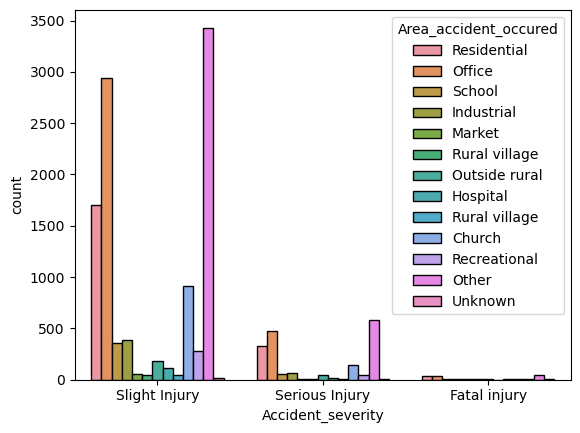

In [38]:

sns.countplot(data = data,
              x  = 'Accident_severity',
              edgecolor = 'black',
              width=0.8,
              hue='Area_accident_occured',
              hue_order=['Residential','Office','School','Industrial','Market',
                        'Rural village' ,'Outside rural' ,'Hospital',
                        'Rural village','Church' ,'Recreational','Other','Unknown']
            )
plt.show()